# What is the average depreciation rate for cars of different models? #

### Import the data, dependencies, conver saledate into saleyear, and view data ###

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
pd.set_option('display.max_columns', 500)
str_path_file = "Data/clean_car_prices.csv"
df_clean_car_prices = pd.read_csv(str_path_file)
int_clean_car_prices_checksum = 472325
print(f"Dataframe import size {len(df_clean_car_prices)} rows, clean checksum is {int_clean_car_prices_checksum}, run at {datetime.datetime.now()}")

Dataframe import size 558705 rows, clean checksum is 472325, run at 2024-03-25 10:06:00.144974


In [2]:
df_clean_car_prices = df_clean_car_prices[(df_clean_car_prices['age_when_sold'] > 1) ]
df_clean_car_prices = df_clean_car_prices[(df_clean_car_prices['age_when_sold'] < 11) ]
print(f"Dataframe import size {len(df_clean_car_prices)} rows, clean checksum is {int_clean_car_prices_checksum}, run at {datetime.datetime.now()}.  Difference is only cars between 1 and 10 years old are used, inclusive")

Dataframe import size 402517 rows, clean checksum is 472325, run at 2024-03-25 10:06:00.607334.  Difference is only cars between 1 and 10 years old are used, inclusive


### Group by 'Make-Model' and 'saleyear' and calculate 'meansellingprice' ###

In [3]:
df_age_when_sold_grouped = df_clean_car_prices.groupby(['Make-Model', 'model', 'make', 'age_when_sold'])['sellingprice'].mean().reset_index()
df_age_when_sold_grouped.rename(columns={'sellingprice': 'meansellingprice'}, inplace=True)
print(datetime.datetime.now())
print(f"The df_age_when_sold_grouped dataframe has {len(df_age_when_sold_grouped)} records.")

2024-03-25 10:06:01.067354
The df_age_when_sold_grouped dataframe has 3014 records.


In [5]:
# Calculate percentage change in mean selling price for each make-model
df_age_when_sold_grouped['Percent_change_meansellingprice'] = df_age_when_sold_grouped.groupby(['Make-Model'])['meansellingprice'].pct_change() * 100

# Remove NaN values resulting from the first row of each group
df_age_when_sold_grouped.dropna(subset=['Percent_change_meansellingprice'], inplace=True)

# Convert percentage change to floating-point number after stripping '%'
df_age_when_sold_grouped['Percent_change_meansellingprice_float'] = df_age_when_sold_grouped['Percent_change_meansellingprice'].replace('%', '', regex=True).astype(float)

# Format the percentage change column
df_age_when_sold_grouped['Percent_change_meansellingprice'] = df_age_when_sold_grouped['Percent_change_meansellingprice'].map(lambda x: f"{x:.2f}%")
print(datetime.datetime.now())
print(f"Dataframe import size {len(df_age_when_sold_grouped)} rows run at {datetime.datetime.now()}")

2024-03-25 10:06:01.321395
Dataframe import size 2358 rows run at 2024-03-25 10:06:01.323405


In [7]:
selected_models = ['f-150', 'taurus', 'titan', 'sentra', 'corolla', 'tacoma', 'c/k 2500 series','malibu']
df_age_when_sold_grouped= df_age_when_sold_grouped[df_age_when_sold_grouped['model'].isin(selected_models)]

truck_models = ['f-150', 'titan', 'tacoma', 'c/k 2500 series']
trucks = df_age_when_sold_grouped[df_age_when_sold_grouped['model'].isin(truck_models)]

car_models = ['taurus', 'sentra', 'corolla', 'malibu']
cars= df_age_when_sold_grouped[df_age_when_sold_grouped['model'].isin(car_models)]
print(datetime.datetime.now())

2024-03-25 10:06:01.627026


In [8]:
# Regression model for trucks
t_x_values=trucks['age_when_sold']
t_y_values=trucks['meansellingprice']

(t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr) = linregress(t_x_values,t_y_values)
t_regress_values = t_x_values * t_slope + t_intercept
print(datetime.datetime.now())

2024-03-25 10:06:01.993468


In [9]:
# Regression model for cars
c_x_values=cars['age_when_sold']
c_y_values=cars['meansellingprice']

(c_slope, c_intercept, c_rvalue, c_pvalue, c_stderr) = linregress(c_x_values,c_y_values)
c_regress_values = c_x_values * c_slope + c_intercept
print(datetime.datetime.now())

2024-03-25 10:06:02.042578


In [10]:
# Regression model for all vehicles
x_values=df_age_when_sold_grouped['age_when_sold']
y_values=df_age_when_sold_grouped['meansellingprice']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
def dollar_format(x, pos):
    return '${:,.0f}'.format(x)
formatter = FuncFormatter(dollar_format)

Black line is for all cars, green is for trucks, and purple is for sedans
R-values for lines: All Vehicles - Black: -0.7 Cars - Purple: -0.91 Trucks - Green-0.97
Slopes for lines: All Vehicles - Black: -1750.78 Cars - Purple: -1224.76 Trucks - Green-2417.42


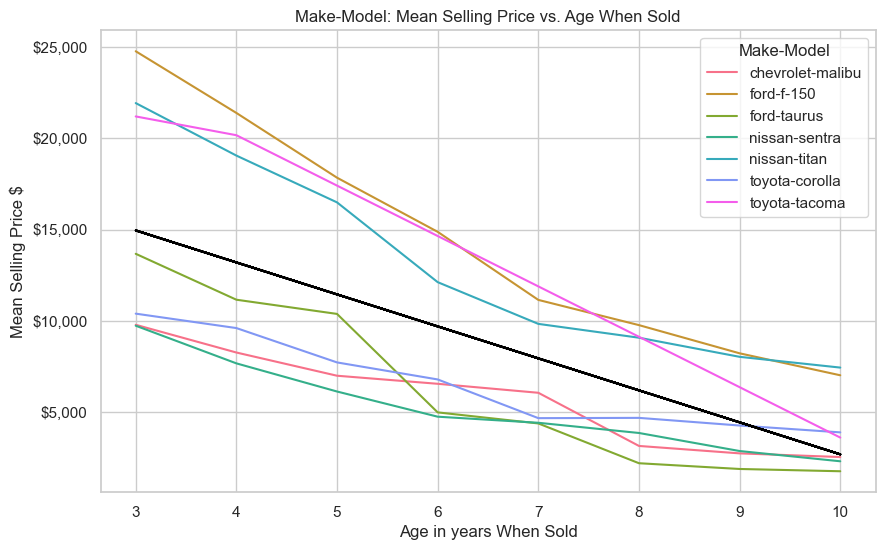

In [20]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_age_when_sold_grouped, x='age_when_sold', y='meansellingprice', hue='Make-Model', palette='husl')


# Set the title and labels
plt.title('Make-Model: Mean Selling Price vs. Age When Sold')
plt.xlabel('Age in years When Sold')
plt.ylabel('Mean Selling Price $')

plt.plot(x_values, regress_values, color='black', linestyle=':')
#plt.plot(t_x_values, t_regress_values, color='green', linestyle=':')
#plt.plot(c_x_values, c_regress_values, color='purple', linewidth=2, linestyle=':')

plt.gca().yaxis.set_major_formatter(formatter)

# Display the plot
plt.legend(title='Make-Model', loc='upper right')
print("Black line is for all cars, green is for trucks, and purple is for sedans")
print(f"R-values for lines: All Vehicles - Black: {round(rvalue,2)} Cars - Purple: {round(c_rvalue,2)} Trucks - Green{round(t_rvalue,2)}")
print(f"Slopes for lines: All Vehicles - Black: {round(slope,2)} Cars - Purple: {round(c_slope,2)} Trucks - Green{round(t_slope,2)}")
plt.show()

2024-03-25 10:06:05.132433


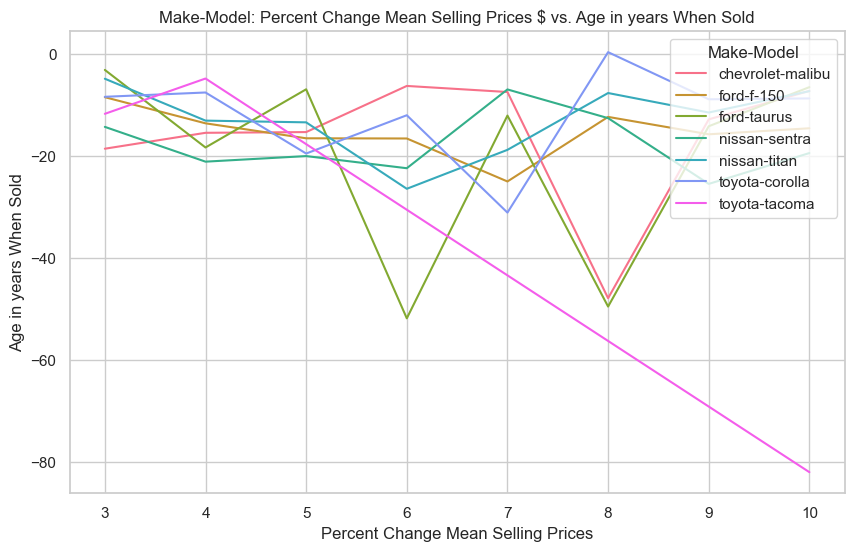

In [12]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_age_when_sold_grouped, x='age_when_sold', y='Percent_change_meansellingprice_float', hue='Make-Model', palette='husl')

# Set the title and labels
plt.title('Make-Model: Percent Change Mean Selling Prices $ vs. Age in years When Sold')
plt.xlabel('Percent Change Mean Selling Prices')
plt.ylabel('Age in years When Sold')

# Display the plot
plt.legend(title='Make-Model', loc='upper right')
print(datetime.datetime.now())
plt.show()

2024-03-25 10:06:07.351603


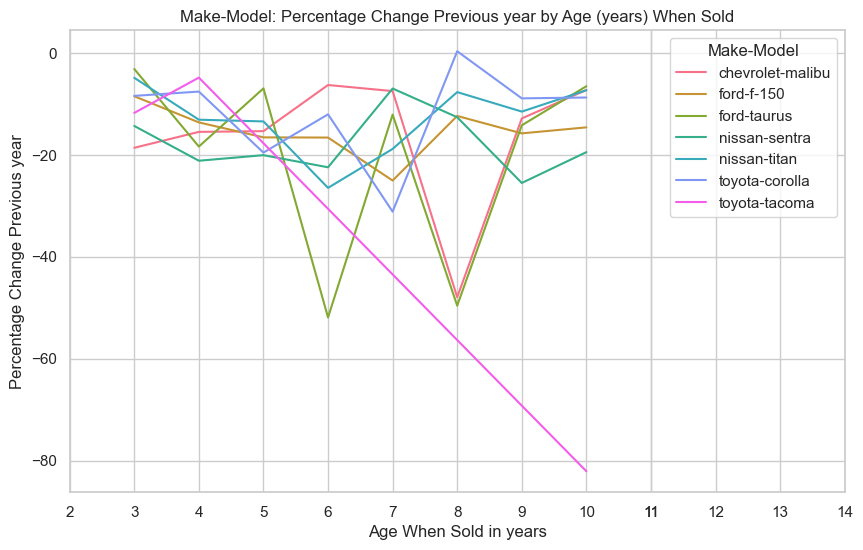

In [13]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_age_when_sold_grouped, x='age_when_sold', y='Percent_change_meansellingprice_float', hue='Make-Model', palette='husl')

# Set the title and labels
plt.title('Make-Model: Percentage Change Previous year by Age (years) When Sold')
plt.xlabel('Age When Sold in years')
plt.ylabel('Percentage Change Previous year')

# Display the plot
plt.legend(title='Make-Model', loc='upper right')
plt.xticks(list(plt.xticks()[0]) + [11, 12, 13, 14])
print(datetime.datetime.now())
plt.show()

2024-03-25 10:06:09.411270


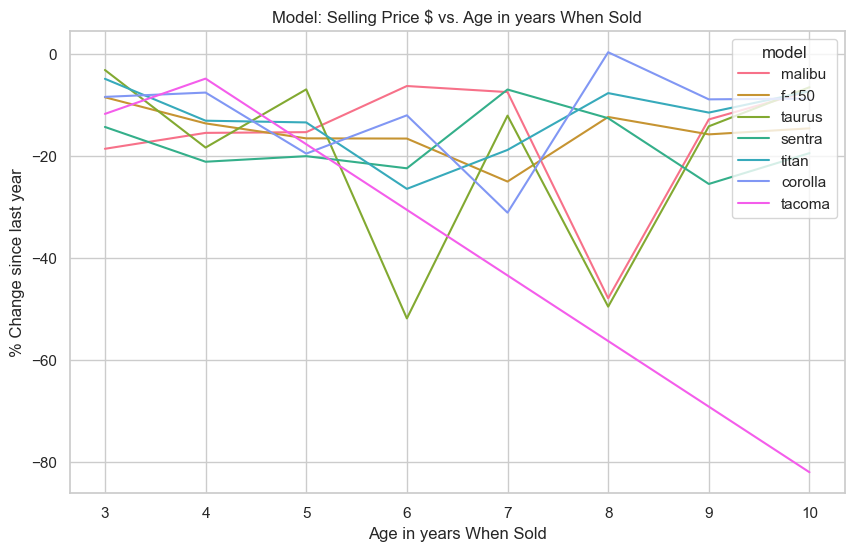

In [14]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_age_when_sold_grouped, x='age_when_sold', y='Percent_change_meansellingprice_float', hue='model', palette='husl')

# Set the title and labels
plt.title('Model: Selling Price $ vs. Age in years When Sold')
plt.xlabel('Age in years When Sold')
plt.ylabel('% Change since last year')

# Display the plot
plt.legend(title='model', loc='upper right')
print(datetime.datetime.now())
plt.show()